### Chipotle Pandas Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('chipotle.tsv',sep='\t')

### DATA CLEANING

#### viewing first 10 rows

In [3]:
data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


#### remvoving dollar sign and converitng to float

In [5]:
# removing dollar sign
data['item_price']=data['item_price'].str[1:]

In [6]:
# converting to float
data['item_price']=data['item_price'].astype('float')

#### checking for null values

In [7]:
data.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

#### shape of dataset

In [8]:
data.shape

(4622, 5)

#### formatting the choice_description column

In [9]:
# replacing null value
data.fillna("no description", inplace=True)

In [10]:
data['choice_description']=data['choice_description'].apply(lambda x: x.replace('[','').replace(']',''))

In [11]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,no description,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,no description,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98


## Analysis

#### most orderd item

In [12]:
#creating dataframe with items and quantity orderd
item_quantity=data.groupby('item_name')['quantity'].sum()
item_quantity_sort=pd.DataFrame(item_quantity.sort_values(ascending=False))
item_quantity_sort.head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [13]:
# most orderd item
item_quantity_sort.iloc[0]

quantity    761
Name: Chicken Bowl, dtype: int64

#### top 10 best selling items

<Axes: xlabel='item_name'>

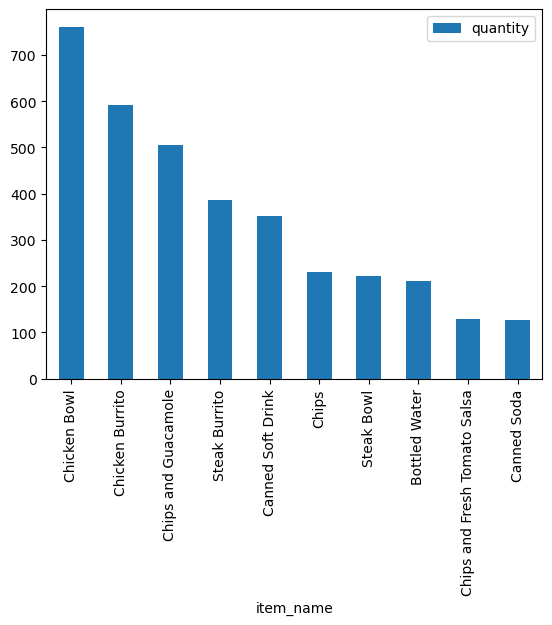

In [36]:
top_10=pd.DataFrame(item_quantity_sort.iloc[0:10])
top_10.plot(kind='bar')                

#### most ordered item in choice_description 

In [29]:
choice_quantity = data.groupby('choice_description')['quantity'].sum()
choice_quantity_sorted = pd.DataFrame(choice_quantity.sort_values(ascending=False))
choice_quantity_sorted.iloc[0]

quantity    1382
Name: no description, dtype: int64

#### Total orders

In [14]:
orders=data.groupby('order_id')
len(orders)

1834

#### Average number of items in an order

In [15]:
order_quantity=data.groupby('order_id')['quantity'].sum()
order_quantity_df=pd.DataFrame(order_quantity)
order_quantity_df['quantity'].mean()

2.711014176663032

#### Number of items sold

In [16]:
data['item_name'].nunique()

50

#### Total revenue

In [31]:
# adding revenue to data
data["revenue"]=data['quantity']*data['item_price']

In [32]:
data['revenue'].sum()

39237.02

#### Average revenue per order

In [18]:
order_group=data.groupby('order_id')['revenue'].sum()
order_group.mean()

21.39423118865867

#### Number of Soft drinks Orderd

In [19]:
soft_drink=data.groupby('item_name')
soft_drink_df=soft_drink.get_group('Canned Soft Drink')
soft_drink_df['quantity'].sum()

351

#### Soft drink preferance

In [20]:
soft_drink_quant=soft_drink_df[['quantity','choice_description']]
sf_orderd=soft_drink_quant.groupby('choice_description')['quantity'].sum()
sf_orderd

choice_description
Coke         122
Diet Coke    115
Lemonade      34
Nestea        18
Sprite        62
Name: quantity, dtype: int64

<Axes: ylabel='quantity'>

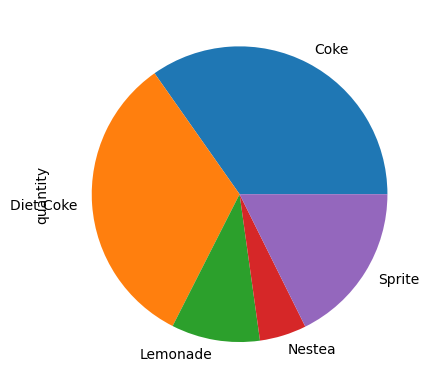

In [21]:
# visulasing using pie chart
sf_orderd.plot(kind='pie')

#### Salsa Type Preference of customers

In [22]:
# creating a dataframe with orders of salsa
salsa = data.copy()

In [23]:
# editing data frame to have only type of salsa ordered
salsa['choice_description']=data['choice_description'].apply(lambda x : x.split(',')[0])
salsa=salsa[salsa['choice_description'].str.contains('Salsa')]

In [24]:
salsa.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,Tomatillo-Red Chili Salsa (Hot),16.98,33.96
5,3,1,Chicken Bowl,Fresh Tomato Salsa (Mild),10.98,10.98
7,4,1,Steak Burrito,Tomatillo Red Chili Salsa,11.75,11.75
8,4,1,Steak Soft Tacos,Tomatillo Green Chili Salsa,9.25,9.25
9,5,1,Steak Burrito,Fresh Tomato Salsa,9.25,9.25


In [25]:
# finding quantity of each salsa
salsa_quantity=salsa.groupby('choice_description')['quantity'].sum()
salsa_quantity

choice_description
Fresh Tomato Salsa                      1112
Fresh Tomato Salsa (Mild)                334
Roasted Chili Corn Salsa                 461
Roasted Chili Corn Salsa (Medium)        184
Tomatillo Green Chili Salsa              238
Tomatillo Red Chili Salsa                340
Tomatillo-Green Chili Salsa (Medium)      97
Tomatillo-Red Chili Salsa (Hot)          166
Name: quantity, dtype: int64

<Axes: ylabel='quantity'>

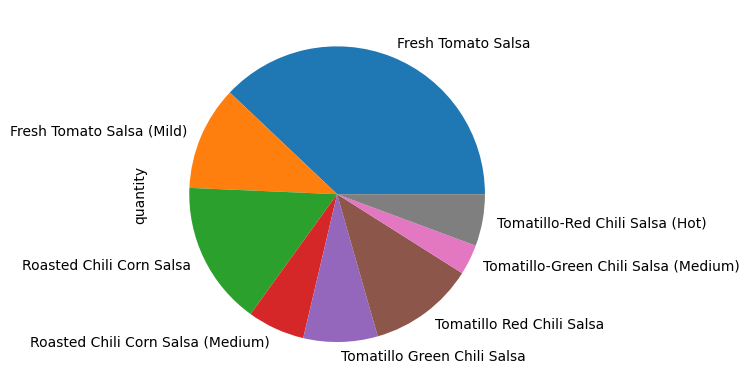

In [26]:
salsa_quantity.plot(kind="pie")